In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stage_2_train_labels.csv')

In [3]:
data.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [4]:
data.shape

(30227, 6)

In [5]:
class_details = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stage_2_detailed_class_info.csv')

In [6]:
class_details.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [7]:
class_details.shape

(30227, 2)

In [8]:
# Check the missing values

data.isna().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [9]:
class_details.isna().sum()

patientId    0
class        0
dtype: int64

In [10]:
# train data contains missing values

In [11]:
# Now we have to merge the two datasets

data = pd.concat([data,class_details["class"]],axis=1,sort=False)

In [12]:
data.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [13]:
data.shape

(30227, 7)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [15]:
# x, y, width, height contains null values
# Null values indicates the absence of pneumonia window. 
# Hence we can give 0 to those values

In [16]:
data = data.fillna('0.0')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   x          30227 non-null  object
 2   y          30227 non-null  object
 3   width      30227 non-null  object
 4   height     30227 non-null  object
 5   Target     30227 non-null  int64 
 6   class      30227 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.6+ MB


In [18]:
# Now we dont have any null values

In [19]:
# Check for duplicate entries

data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   x          30227 non-null  object
 2   y          30227 non-null  object
 3   width      30227 non-null  object
 4   height     30227 non-null  object
 5   Target     30227 non-null  int64 
 6   class      30227 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [20]:
# No duplicates present

In [21]:
data['class'].nunique()

3

In [22]:
data['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

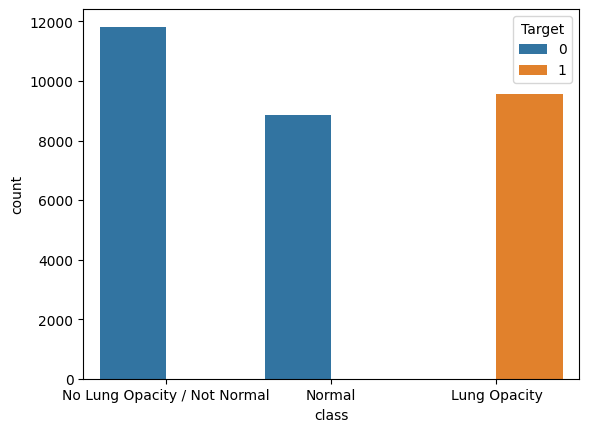

In [23]:
sns.countplot(x = 'class', hue = 'Target', data = data)

In [24]:
data.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [25]:
data.dtypes

patientId    object
x            object
y            object
width        object
height       object
Target        int64
class        object
dtype: object

In [26]:
data['x'] = data['x'].astype(float)

In [27]:
data.dtypes

patientId     object
x            float64
y             object
width         object
height        object
Target         int64
class         object
dtype: object

In [28]:
data['y'] = data['y'].astype(float)
data['width'] = data['width'].astype(float)
data['height'] = data['height'].astype(float)

In [29]:
data.dtypes

patientId     object
x            float64
y            float64
width        float64
height       float64
Target         int64
class         object
dtype: object

In [30]:
data.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'class'], dtype='object')

In [31]:
x = data.drop("Target",axis=1)
y = data["Target"]

In [32]:
x = x.drop("patientId",axis=1)

In [33]:
x['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [34]:
# Label encoding for class

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['class'] = le.fit_transform(x['class'])

In [35]:
x.dtypes

x         float64
y         float64
width     float64
height    float64
class       int64
dtype: object

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=134)

In [37]:
x_train.shape

(24181, 5)

In [38]:
y_train.shape

(24181,)

In [39]:
# Building the model 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
model = Sequential()
model.add(Dense(32, activation = "relu",input_shape = (5,)))
model.add(Dense(16, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,553
Trainable params: 1,553
Non-trainabl

In [46]:
# Compiling the model

model.compile(optimizer="adam",metrics = ['accuracy'], loss = "mean_squared_error")

In [47]:
x_train.shape

(24181, 5)

In [48]:
# Fit the model
import numpy as np
model.fit(x_train, y_train , epochs = 20, batch_size= 10)

Epoch 1/20
2419/2419 [==============================] - 13s 4ms/step - loss: 1.4692e-19 - accuracy: 1.0000
Epoch 2/20
2419/2419 [==============================] - 10s 4ms/step - loss: 1.5020e-05 - accuracy: 1.0000
Epoch 3/20
2419/2419 [==============================] - 10s 4ms/step - loss: 3.8354e-07 - accuracy: 1.0000
Epoch 4/20
2419/2419 [==============================] - 9s 4ms/step - loss: 1.5973e-06 - accuracy: 1.0000
Epoch 5/20
2419/2419 [==============================] - 10s 4ms/step - loss: 7.9581e-07 - accuracy: 1.0000
Epoch 6/20
2419/2419 [==============================] - 11s 4ms/step - loss: 7.3268e-07 - accuracy: 1.0000
Epoch 7/20
2419/2419 [==============================] - 11s 4ms/step - loss: 1.4692e-19 - accuracy: 1.0000
Epoch 8/20
2419/2419 [==============================] - 9s 4ms/step - loss: 7.1363e-06 - accuracy: 1.0000
Epoch 9/20
2419/2419 [==============================] - 11s 4ms/step - loss: 1.4692e-19 - accuracy: 1.0000
Epoch 10/20
2419/2419 [================

In [49]:
model.evaluate(x_test, y_test)

189/189 [==============================] - 1s 4ms/step - loss: 4.1039e-15 - accuracy: 1.0000


[4.103895381754293e-15, 1.0]